# Polynomial Regression et Regularisation

# A. Polynomial Regression

## Exercice 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
x = np.random.rand(30,1)
y = np.cos(1.5 * np.pi * x) + np.random.randn(30,1) * 0.1

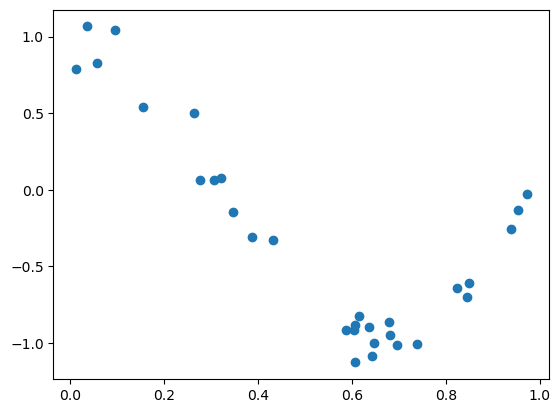

In [3]:
plt.scatter(x,y)

In [4]:
w0_init = np.random.randn()
w1_init = np.random.randn()
epochs = 1000
learning_rate = 0.005

In [5]:
def gradient_descent_1(x, y, w0, w1):    
    for k in range(1000):
        for j in range(len(x)):
            h = w1 * x[j] + w0
            w0 = w0 + 2 * learning_rate * (y[j] - h)
            w1 = w1 + 2 * learning_rate * (y[j] - h) * x[j]
    return w0, w1

In [6]:
w0, w1 = gradient_descent_1(x, y, w0_init, w1_init)
print(w0, w1)

[0.60550861] [-1.78921677]


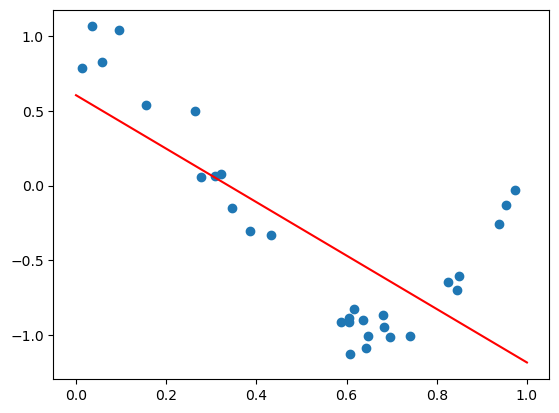

In [7]:
# Affichage du modele apres l'apprentissage gradient descent
z = np.linspace(0, 1, 100)
plt.scatter(x,y)
plt.plot(z, w0 + w1 * z,'r')

In [8]:
ones = np.ones((30, 1))
x_normal = np.hstack((x, ones))

In [9]:
theta = np.linalg.inv(x_normal.T @ x_normal) @ x_normal.T @ y
theta

array([[-1.77004036],
       [ 0.61167282]])

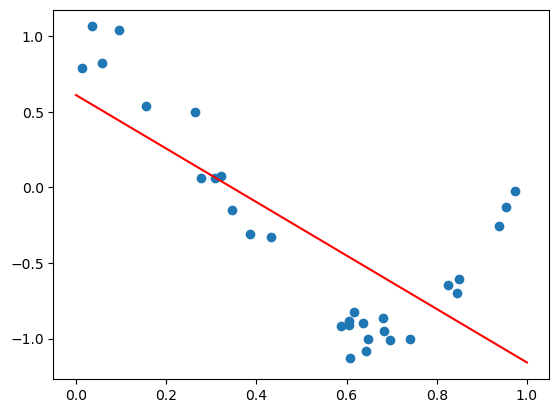

In [10]:
# Affichage du modele apres l'apprentissage moindre carre
z = np.linspace(0, 1, 100)
plt.scatter(x,y)
plt.plot(z, theta[1] + theta[0] * z,'r')

## Exercice 2 

In [11]:
def x_polynomial(X, degrees):
    t = X.copy()
    for i in degrees:
        X = np.append(X, t**i, axis=1)
    return X

In [12]:
def gradient_descent(x, y, epochs, learning_rate):
    m, d = x.shape
    ones = np.ones((m,1))
    X = np.hstack((ones,x))
    w = np.random.randn(d+1,1)
    loss = []
    
    for k in range(epochs):
        h = np.dot(X,w)
        dw = (1/m) * np.dot(X.T,(y-h))
        w = w + learning_rate * dw
        loss.append(np.mean((y - h)**2))
    return w, loss

In [13]:
degrees = [2, 3, 4]

Xp = x_polynomial(x, degrees)
print(Xp.shape)

(30, 4)


In [14]:
w, loss = gradient_descent(Xp, y, 30000, 0.005)
print(w)

[[ 0.98549123]
 [-2.58530941]
 [-2.46778359]
 [ 1.24424002]
 [ 2.91608796]]


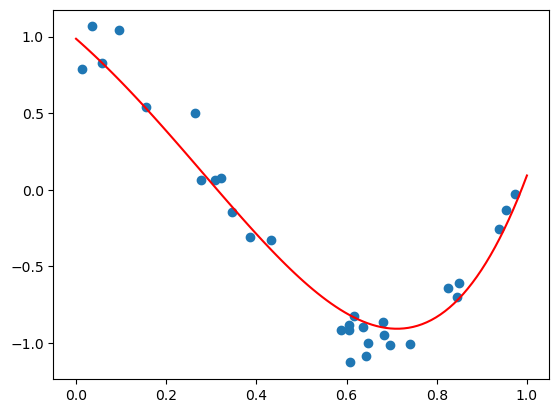

In [15]:
z = np.linspace(0, 1, 100)
plt.scatter(x, y)
plt.plot(z, w[0] + w[1] * z + w[2] * (z**2) + w[3] * (z**3) + w[4] * (z**4), 'r')

In [16]:
def ordinary_least_squares(x, y):
    m, d = x.shape
    ones = np.ones((m,1))
    X = np.hstack((ones,x))
    
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [17]:
theta = ordinary_least_squares(Xp, y)
print(theta)

[[  0.88172614]
 [  1.66138398]
 [-21.8272098 ]
 [ 29.36107398]
 [ -9.94056751]]


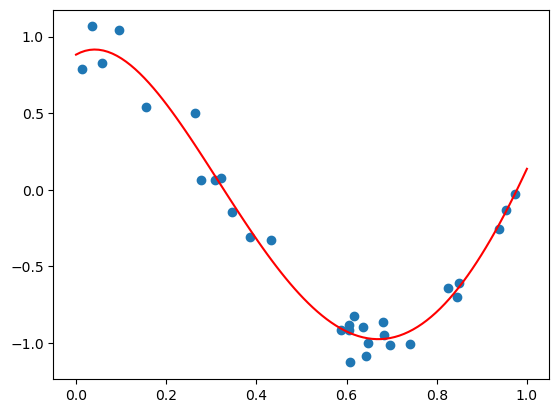

In [18]:
# Affichage du modele apres l'apprentissage moindre carre
z = np.linspace(0, 1, 100)
plt.scatter(x,y)
plt.plot(z, theta[0] + theta[1] * z + theta[2] * (z**2) + theta[3] * (z**3) + theta[4] * (z**4), 'r')

In [19]:
def mean_square_error(x,y,w):
    m,d = x.shape
    ones = np.ones((m,1))
    X = np.hstack((ones,x))
    h = np.dot(X,w)
    return np.mean((y-h)**2)

In [20]:
mse_gradient_descent = mean_square_error(Xp,y,w)
print(f"MSE of gradient descent : {mse_gradient_descent}")

MSE of gradient descent : 0.01888932169739296


In [21]:
mse_normal_equation = mean_square_error(Xp,y,theta)
print(f"MSE of gradient descent : {mse_normal_equation}")

MSE of gradient descent : 0.01021312980086741


# B. Regularization

## Exercice 1

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
Xp = PolynomialFeatures(degree=11, include_bias=True).fit_transform(x)
model= LinearRegression().fit(Xp,y)
w = model.coef_[0,:]
w0 = model.intercept_

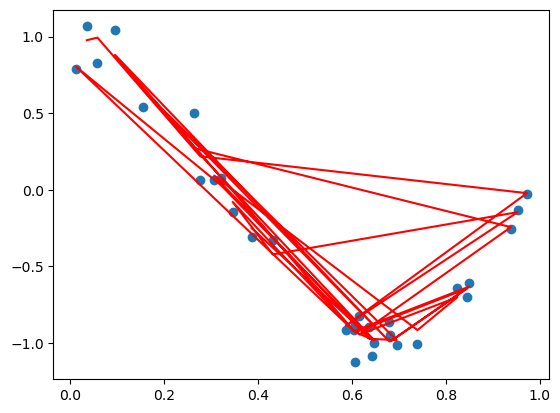

In [23]:
plt.scatter(x, y)
plt.plot(x, model.predict(Xp), 'r')
plt.show()

## Exercice 2

In [24]:
from sklearn.linear_model import Ridge, Lasso
lmbda = 0.001
ridModel = Ridge(lmbda).fit(Xp,y)
w = ridModel.coef_[0,:]
w0 = ridModel.intercept_
lasModel = Lasso(lmbda).fit(Xp,y)
w = lasModel.coef_
w0 = lasModel.intercept_

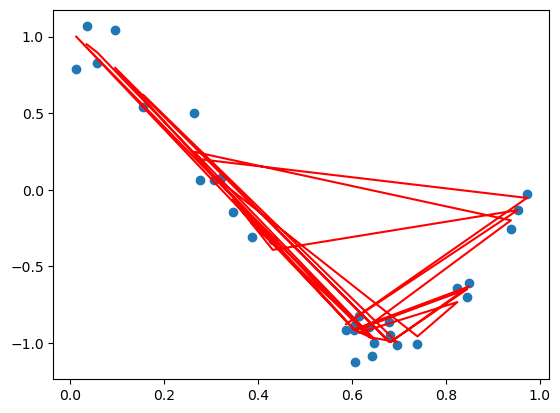

In [25]:
plt.scatter(x, y)
plt.plot(x, ridModel.predict(Xp), 'r')

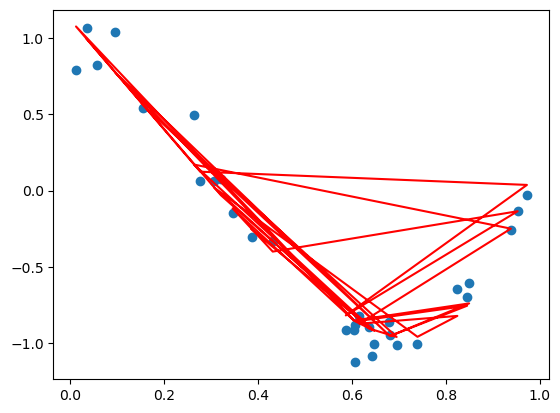

In [26]:
plt.scatter(x, y)
plt.plot(x, lasModel.predict(Xp), 'r')